In [1]:
# Run this cell to load DANDAS and NumPy software
from DANDAS_mainSoftware import DANDAS
import numpy as np

Note: you may need to restart the kernel to use updated packages.


### Use the following cell to call DANDAS

1

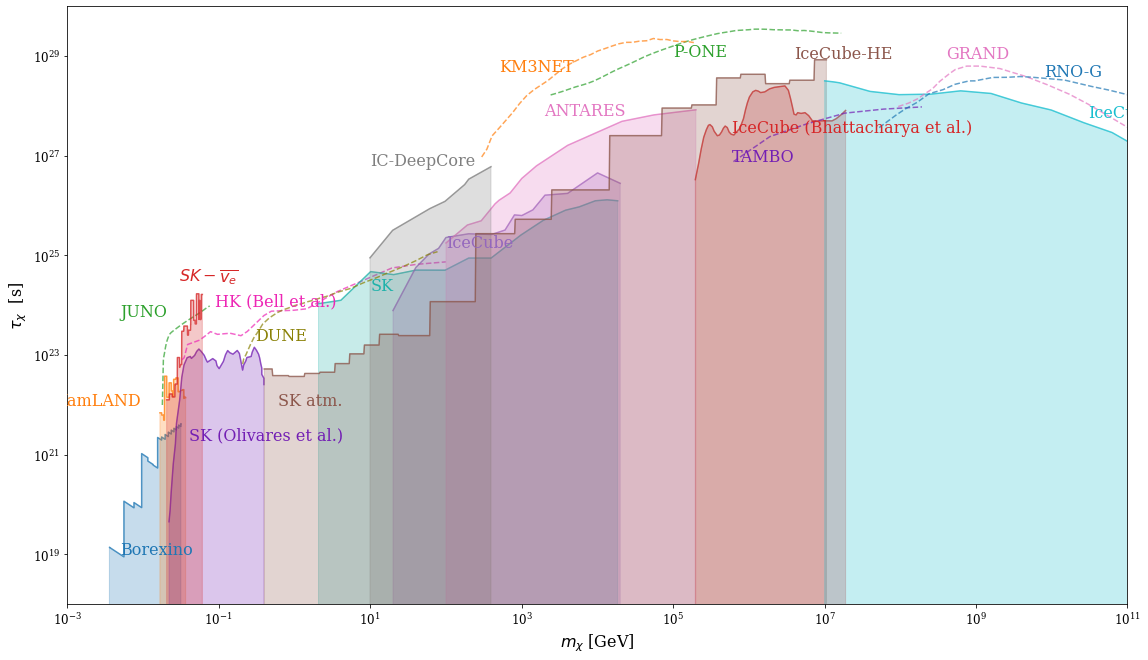

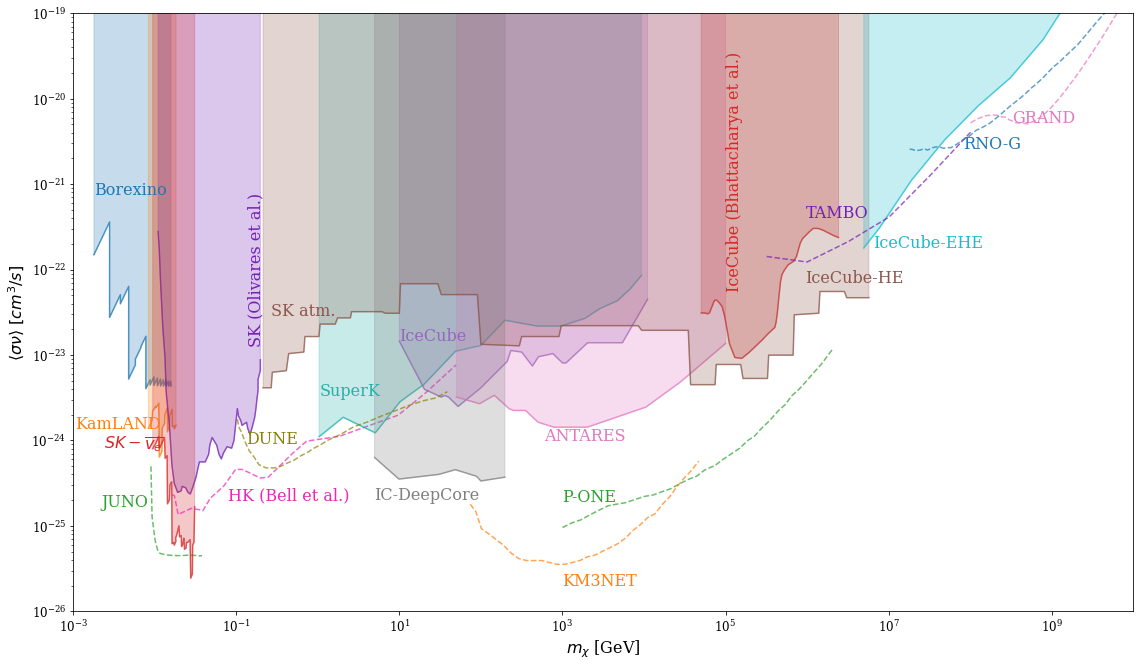

In [2]:
#Edit DANDAS's input parameters to your liking (full info on how inputs should be used is included in README.md)
DANDAS('NFW','Majorana','Full_Plot',reduce_runtime=False,data=False,m_x=1)

### Examples of Different Ways to Apply DANDAS

array([[1.71220862e-23],
       [3.73518199e+22]])

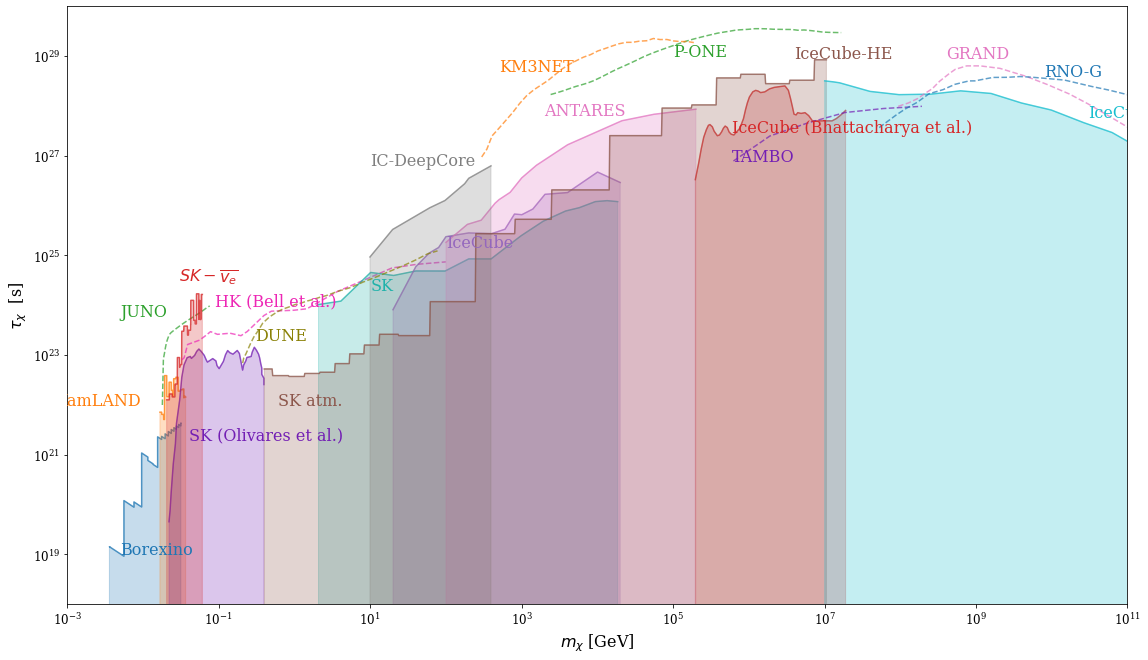

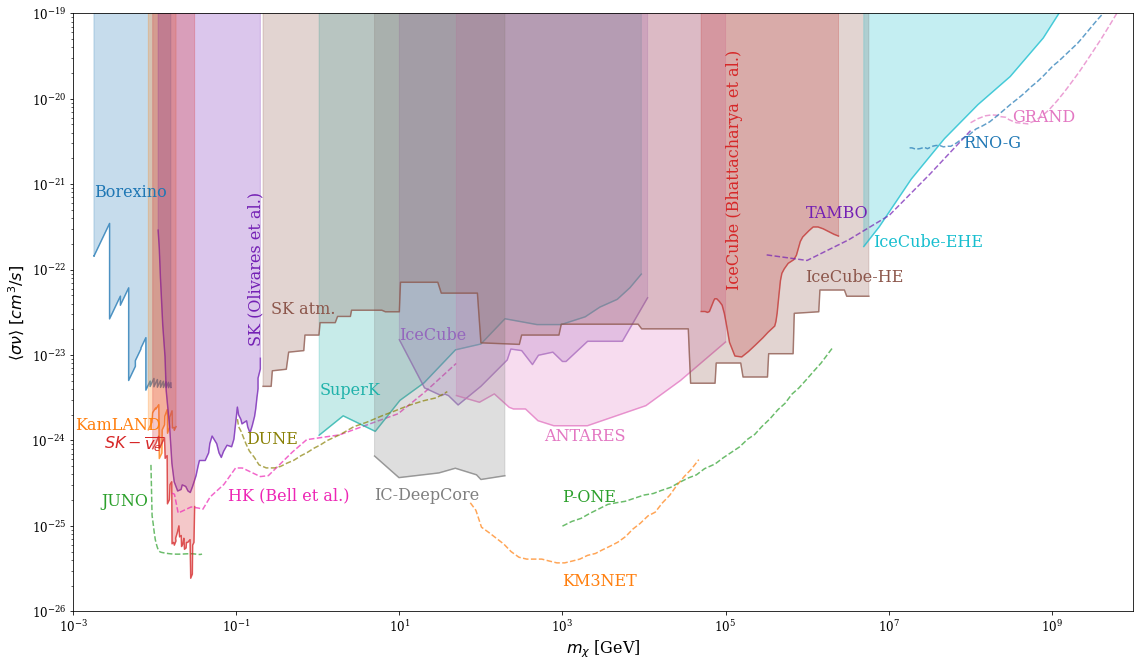

In [3]:
#Assuming an Einasto DM halo profile (without custom parameters), and dark matter is a Majorana particle,DANDAS will output 
#2 full plots (one for annihilation cross section (ACR) as a function of DM particle mass and one for lifetime)

DANDAS('Einasto','Majorana','Full_Plot',reduce_runtime=False,data=True,m_x=1)

For a DM particle with mass = 1000.0 GeV:
The upper bound on DM annihilation cross section is 1.4867488343218904e-24 cm^3/s.
The lower bound on DM lifetime is t= 7.018280708555992e+26 seconds.
For a DM particle with mass = 25750.0 GeV:
The upper bound on DM annihilation cross section is 4.7124695010864906e-24 cm^3/s.
The lower bound on DM lifetime is t= 3.648612311156531e+27 seconds.
For a DM particle with mass = 50500.0 GeV:
The upper bound on DM annihilation cross section is 4.6764932961571044e-24 cm^3/s.
The lower bound on DM lifetime is t= 6.595396551457462e+27 seconds.
For a DM particle with mass = 75250.0 GeV:
The upper bound on DM annihilation cross section is 5.8661162223488946e-24 cm^3/s.
The lower bound on DM lifetime is t= 9.095732279777313e+27 seconds.
For a DM particle with mass = 100000.0 GeV:
The upper bound on DM annihilation cross section is 8.059051897296032e-24 cm^3/s.
The lower bound on DM lifetime is t= 9.095732279777313e+27 seconds.


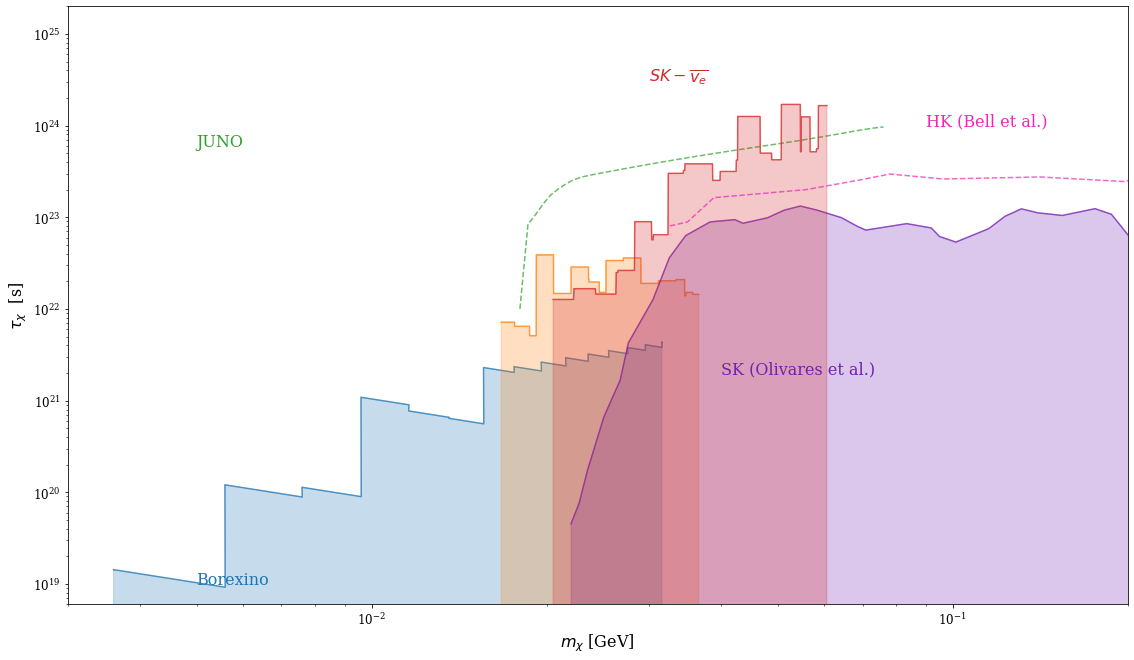

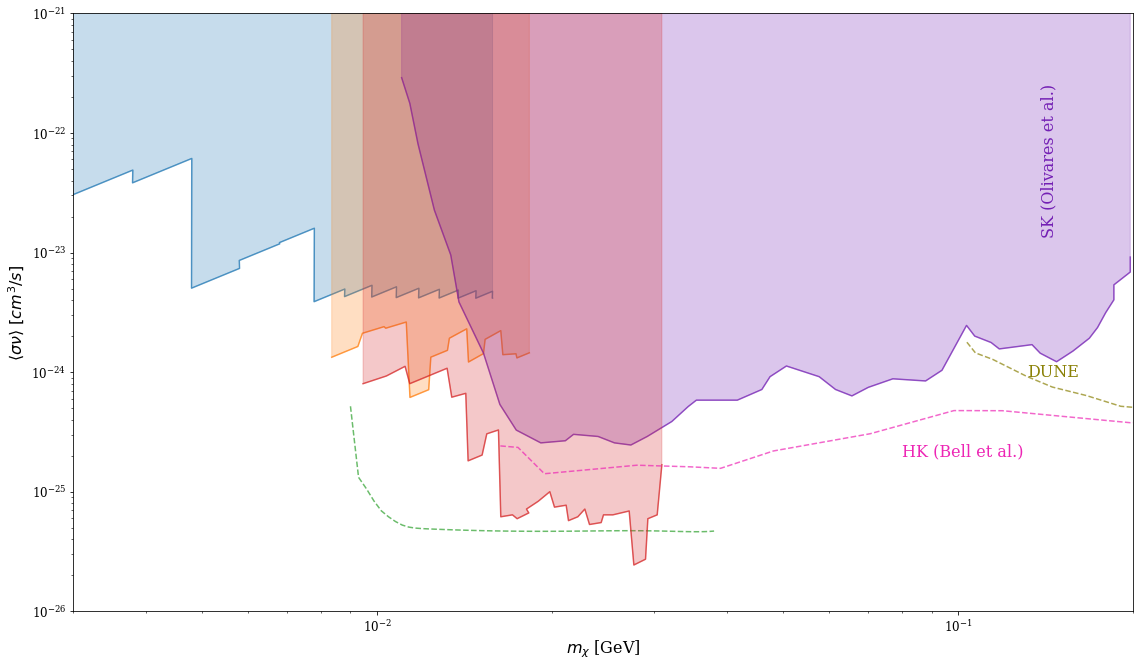

In [4]:
#Same conditions as above except now a zoomed in version of the plot is desired over a specified region and mass is given as an array

DM_mass_array=np.linspace(1e3,1e5,5)

dec_bounds=np.array([3e-3,0.2,6e18,2e25])
ann_bounds=np.array([3e-3,0.2,1e-26,1e-21])

parameters=DANDAS('Einasto','Majorana','Custom_plot',reduce_runtime=False,data=True,m_x=DM_mass_array, plot_axes_ann=ann_bounds,plot_axes_dec=dec_bounds)

for i in range(len(DM_mass_array)):
    print('For a DM particle with mass =',DM_mass_array[i],'GeV:')
    print('The upper bound on DM annihilation cross section is',parameters[0,0,i],'cm^3/s.')
    print('The lower bound on DM lifetime is t=',parameters[1,0,i],'seconds.')

1

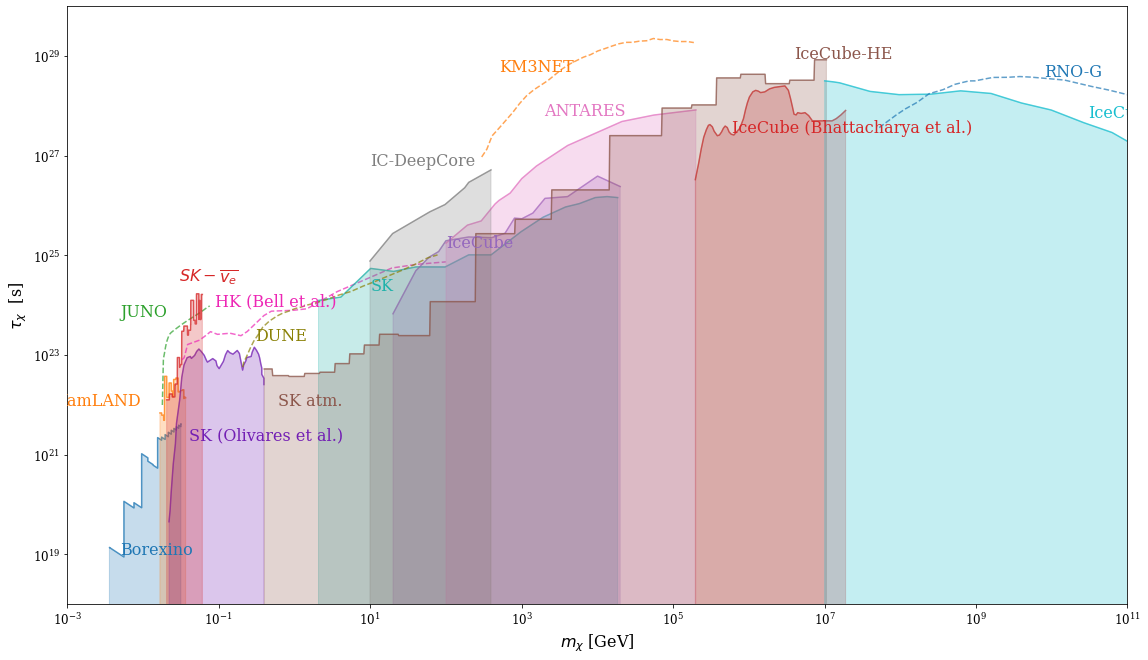

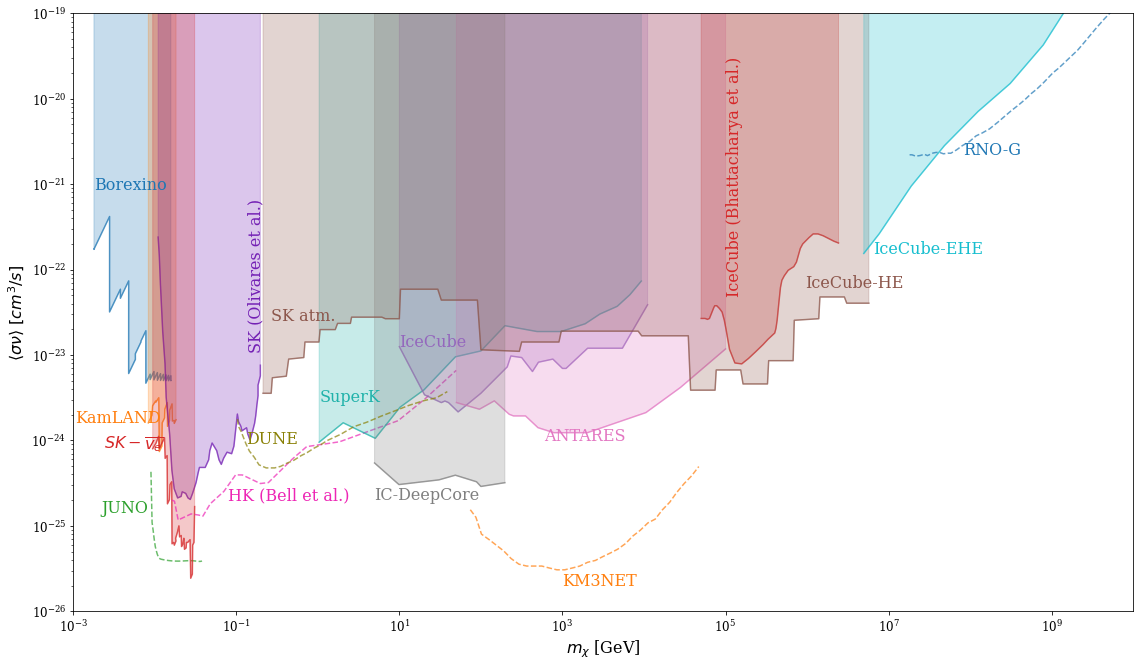

In [5]:
#Assuming a NFW halo profile with custom parameters (assuming a DM is Majorana and outputting two full plots)
DANDAS('NFW Custom','Majorana','Full_Plot',reduce_runtime=True,data=False,r_halo=200*3.0857e21,r0 =  8.127 * 3.0857e21,rs = 20 * 3.0857e21, rho_0 = 0.4 , gamma=1.26 )

#NOTE: factor of 3.0857e21 is used to convert kiloparsec to cm

In [ ]:
#Using a custom density function to model DM density (equation for Burkert Halo profile in this case)

#Equation 2 in https://arxiv.org/pdf/astro-ph/9504041.pdf
def Burkert_HaloProfile(r):
    r0 =  8.127 * 3.0857e21 #cm
    rho0 = 0.4             #GeV cm^-3
    numerator= rho0*r0**3
    denominator=(r+r0)*(r**2+r0**2)
    rho_DM= numerator/denominator
    return rho_DM

DANDAS('Custom Density Function','Majorana','Full_Plot',reduce_runtime=True,data=False, rho_function=Burkert_HaloProfile)